## Linear Regression
### Name: Jane Slagle
### Class: Vol 3 Lab bebe
### Section: who even knows, I think 2
### Date: 11/1/22

In [2]:
import numpy as np
import pandas as pd
import scipy.linalg as la
import time
import statsmodels.api as sm
from sklearn import linear_model as lm
from itertools import combinations
from matplotlib import pyplot as plt

## Problem 1
Write a function that takes as input $X$ and **y** as defined on page 1. Call this function **ols**. This function should return the least squares estimator for $\beta$ as a numpy array.

In [3]:
def ols(X, y):
    """
    Solves for the least squares estimator.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpyarray
    """
    #get columns of one to add onto X:
    X = X.reshape((X.shape[0], -1))
    X_ = np.hstack((np.ones(len(y)).reshape(X.shape[0], -1), X))
    
    B = np.linalg.inv(X_.T @ X_)@X_.T@y        #formula for least squares estimator for beta
    
    return B   #its already a numpy array

## Problem 2
Find the least squares estimator for $\beta$ using this random data. 
Produce a plot showing the random data and the line of best fit determined by the least squares estimator for $\beta$. 
Your plot should include a title, axis labels, and a legend. 

In [4]:
#use code given in lab manual to generate random data:
n = 100 # Number of points to generate
X = np.arange(100) # The input X for the function ols
eps = np.random.uniform(-10,10, size=(100,)) # Noise to generate random y coordinates
y = .3*X + 3 + eps # The input y for the function ols

#find least squares estimator for beta using random data: call prob 1 on X, y got from code above
B = ols(X, y)

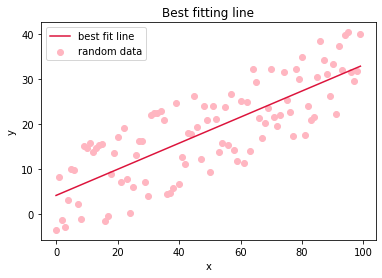

In [5]:
#plot showing random data, line of best fit determined by least squares estimator for beta:
plt.scatter(X, y, color = "lightpink", label = "random data")  #plot the random data

#plot the line of best fit now: y = mx+b where y intercept b given by first thing in beta, slope given by second 
#thing in beta
plt.plot(X, B[1]*X + B[0], color = "crimson", label = "best fit line")

plt.title("Best fitting line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best")

plt.show()

## Problem 3
Write a function that finds the least squares estimator for rank-deficient models using the SVD. 
The function should still take $X$ and **y** as inputs. Call the function **svd_ols** and return the least squares estimator for $\beta$ as a numpy array.

In [6]:
def svd_ols(X, y):
    """
    Solves for the least squares estimator using the SVD.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpy array
    """
    #add columns of ones to X, have reshape so it all works:
    X = X.reshape((X.shape[0], -1))
    X_ = np.hstack((np.ones(len(y)).reshape(X.shape[0], -1), X))
    
    U, E, VH = la.svd(X_, full_matrices = False) #get compact SVD of X now
    
    #get least squares estimator now:
    B = VH.T@np.diag(1/E)@U.T@y
    
    return B    

## Problem 4
Use your function **svd_ols** to find the least squares estimator for a cubic polynomial. 
Create a plot that shows a scatter plot of the data and a curve using the least squares estimator. 
Your plot should include a title, axis labels, and a legend.

In [7]:
#use code given in lab manual to generate random data:
x = np.linspace(-4, 2, 500)
y = x**3 + 3*x**2 - x - 3.5
eps = np.random.normal(0, 3, len(y)) # Create noise
y += eps # Add noise to randomize data

#use func svd_ols to find least squares estimator:
X = np.vander(x, 4, increasing = True)  #gives column of x cubed, x squared, x to 1, constants: to get it for
                                        #cubic polynomial like how they ask in problem
B = svd_ols(X[:, 1:], y) #added in column of 1s: vander also has column of 1s so do slicing to get rid of 
                         #columns of 1s from vander bc SVD_ols adds column of 1s on

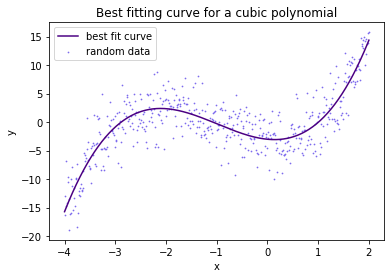

In [8]:
#plot data now:
plt.scatter(x, y, s = 0.5, color = "mediumslateblue", label = "random data")
plt.plot(x, X@B, color = "indigo", label = "best fit curve")  #this is same thing as line of best fit
plt.xlabel("x")
plt.ylabel("y")
plt.title("Best fitting curve for a cubic polynomial")
plt.legend(loc = "best")

plt.show()

## Problem 5
The file **realestate.csv** contains transaction data from 2012-2013. 
It has columns for transaction data, house age, distance to nearest MRT station, number of convenience stores, latitude, longitude, and house price of unit area.
Each row in the array is a separate measurement.

Find the combination of variables that builds the model with the best $R^2$ value when predicting **house price of unit area**. Use **statsmodels** to build each model and calculate $R^2$. Using the same combination of variables, time the methods **ols**, **svd_ols**, and **statsmodels** . Return a list with the first element being a tuple of times for each method and the second element being the best $R^2$ value from the first part of the problem.

In [9]:
def problem5():
    """
    Find the best R2 value using statsmodels.
    Then time ols, svd_ols, and statsmodlels.
    Returns:
        list(): a tuple of times and the best R2 value
    """
    transaction_data = pd.read_csv("realestate.csv")  #load in the data
    
    #want use statsmodels to build each model, calculate R^2 like how they show in lab manual:
    y = transaction_data["Y house price of unit area"]   #extract dependent variable which is house price of unit area
    col_names = ["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", 
                   "X4 number of convenience stores", "X5 latitude", "X6 longitude"]
    temp_X = transaction_data[col_names] #independent variables
    
    R_2 = 0  #list to store all of the R^2 values in
    for i in range(1, len(temp_X) + 1):
        for comb in combinations(col_names, i):  #make combos of the variables that build the model (the cols)
            model = sm.OLS(y, sm.add_constant(temp_X[list(comb)])).fit()  #fit model w/ that specific combo
            #get highest R^2 value:
            if model.rsquared > R_2:
                R_2 = model.rsquared
                max_comb = comb  #get combo that gives us the best R^2 value
    
    #want X with the combo that gives the best R^2 value bc want to time the 3 things w/ this combo:
    X = temp_X[list(max_comb)]  #dont need to add cols of 1s on bc our ols, svd_ols funcs already do that
    
    #time the ols:
    start1 = time.time()
    ols(np.array(X), y)
    end1 = time.time()
    ols_time = end1 - start1  #time for ols to run
    
    #time the svd_ols:
    start2 = time.time()
    svd_ols(np.array(X), y)
    end2 = time.time()
    svd_time = end2 - start2  #time for svd_ols to run
    
    #time the statsmodels method:
    start3 = time.time()
    X_ = sm.add_constant(X)  #need to add column of 1s for when use statsmodels method bc it doesnt have it yet
    sm.OLS(y, X_).fit()
    end3 = time.time()
    sm_time = end3 - start3  #time for statsmodel ols method to run
    
    #want return list w/ 1st element being tuple of times for each method, 2nd being best R2 value found:
    return [(ols_time, svd_time, sm_time), R_2]

In [10]:
problem5()

[(0.0003311634063720703, 0.0006225109100341797, 0.006103992462158203),
 0.5823704472723135]

## Problem 6
Use the file **realestate.csv** and the Python Example on page 4 as a template for constructing **y** and $X$ and calculating model AIC and BIC. 
For the dependent variable, use **house price of unit area**. 
For the independent variables, use **distance to the nearest MRT station**, **number of convenience stores**, **latitude**, and **longitude**.

Find the model that has the lowest AIC and the model that has the lowest BIC. Are they the same model? Print the features of the model with the lowest AIC as a list.

In [11]:
transaction_data = pd.read_csv("realestate.csv")  #load in the data

y = transaction_data["Y house price of unit area"]   #dep var which is house price of unit area
indep_var = ["X3 distance to the nearest MRT station", 
                   "X4 number of convenience stores", "X5 latitude", "X6 longitude"]
temp_X = transaction_data[indep_var] 

AIC = 1000000  #want lowest AIC, BIC so set them super high for when compare in for loop below:
BIC = 1000000

for i in range(1, len(temp_X) + 1):
    for comb in combinations(indep_var, i):  #make combos of the variables that build the model (the cols)
        model = sm.OLS(y, sm.add_constant(temp_X[list(comb)])).fit()  #fit model w/ that specific combo
            
        #get lowest AIC:
        if model.aic < AIC:
            AIC = model.aic
            max_comb_AIC = comb   #get combo that gives us the lowest AIC
        
        #get lowest BIC:
        if model.bic < BIC:
            BIC = model.bic
            max_comb_BIC = comb  #get combo that gives us the lowest BIC

print("AIC:")
print(AIC, list(max_comb_AIC))
print("BIC:")
print(BIC, list(max_comb_BIC))
print("These are the same model, booYUH!!!")

AIC:
3038.5362593218324 ['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']
BIC:
3054.6397232171335 ['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']
These are the same model, booYUH!!!


## Problem 7
Use Ridge and Lasso Regression to model **house price of unit area** from the file **realestate.csv**.
Before fitting each model, run a GridSearch on $\alpha$ to find the optimal value.
Then use the optimal $\alpha$ to fit the model.
Once you have fit the model, you can use the **score** method to get $R^2$. 
Print $R^2$ for each model as a tuple. 
How do these models compare to the models in problem 5?

In [14]:
transaction_data = pd.read_csv("realestate.csv")  #load in the data
y = transaction_data["Y house price of unit area"]   #dep variable is house price of unit area
col_names = ["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", 
                   "X4 number of convenience stores", "X5 latitude", "X6 longitude"]
temp_X = transaction_data[col_names] #indep vars

#find optimal alpha, R^2 for Ridge regression:
ridge_reg = lm.RidgeCV(alphas=np.logspace(-6, 6, 13)) #range for gridsearch
ridge_model = ridge_reg.fit(temp_X, y)   #fit the model
ridge_opt_alph = ridge_reg.alpha_        #best parameter value for alpha
ridge_R2 = ridge_reg.score(temp_X, y)  #get R^2 for ridge regression

#find optimal alpha, R^2 for Lasso regression:
lasso_reg = lm.LassoCV(alphas=np.logspace(-6, 6, 13)) #range for gridsearch
lasso_model = lasso_reg.fit(temp_X, y)   #fit the model
lasso_opt_alph = lasso_reg.alpha_        #best parameter value for alpha
lasso_R2 = lasso_reg.score(temp_X, y)  #get R^2 for ridge regression

#print R^2 for each model as tuple:
print((ridge_R2, lasso_R2))
print("The R^2 values from these models are essentially the same exact R^2 values from problem 5, booYUH not just booYAH!!!")

(0.5823546180967247, 0.5822617746792913)
The R^2 values from these models are essentially the same exact R^2 values from problem 5, booYUH not just booYAH!!!
